In [ ]:
'''Домашнее задание к лекции "Визуализация данных"
Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:
построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).'''

In [147]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [4]:
df_2015 = pd.read_csv('2015.csv')
df_2016 = pd.read_csv('2016.csv')
df_2017 = pd.read_csv('2017.csv')
df_2018 = pd.read_csv('2018.csv')
df_2019 = pd.read_csv('2019.csv')

In [5]:
df_2015['Year'] =2015
df_2016['Year'] =2016
df_2017['Year'] =2017
df_2018['Year'] =2018
df_2019['Year'] =2019

In [187]:
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [189]:
df_2017.head()

,Country,Happiness Rank,Happiness Score,Upper Confidence Interval,Lower Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


In [188]:
df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


In [63]:
#После изучения исходных данных, видмим, что столбцы не одинаковы. Изменим названия столбцов кадра данных за 2017 год
df_2017.columns= ['Country','Happiness Rank','Happiness Score', 'Upper Confidence Interval','Lower Confidence Interval','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom', 'Generosity','Trust (Government Corruption)','Dystopia Residual','Year']

In [81]:
#Объединим похожие
df_total1 = pd.concat([df_2015,df_2016,df_2017],axis=0)
df_total2 = pd.concat([df_2018,df_2019],axis=0)

In [133]:
df_total2.rename({'Score': 'Happiness Score'}, axis=1, inplace=True)

In [134]:
df_total1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470 entries, 0 to 154
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        470 non-null    object 
 1   Region                         315 non-null    object 
 2   Happiness Rank                 470 non-null    int64  
 3   Happiness Score                470 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       470 non-null    float64
 6   Family                         470 non-null    float64
 7   Health (Life Expectancy)       470 non-null    float64
 8   Freedom                        470 non-null    float64
 9   Trust (Government Corruption)  470 non-null    float64
 10  Generosity                     470 non-null    float64
 11  Dystopia Residual              470 non-null    float64
 12  Year                           470 non-null    int

In [135]:
df_total1.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval
count,470.000000,470.000000,158.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,312.000000,312.000000
mean,78.829787,5.370728,0.047885,0.927830,0.990347,0.579968,0.402828,0.134790,0.242241,2.092717,2015.993617,5.269139,5.467245
std,45.281408,1.136998,0.017146,0.415584,0.318707,0.240161,0.150356,0.111313,0.131543,0.565772,0.816907,1.144780,1.125895
min,1.000000,2.693000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.000000,2.521116,2.864884
25%,40.000000,4.509000,0.037268,0.605292,0.793000,0.402301,0.297615,0.059777,0.152831,1.737975,2015.000000,4.366000,4.551835
50%,79.000000,5.282500,0.043940,0.995439,1.025665,0.630053,0.418347,0.099502,0.223140,2.094640,2016.000000,5.211295,5.394889
75%,118.000000,6.233750,0.052300,1.252443,1.228745,0.768298,0.516850,0.173161,0.315824,2.455575,2017.000000,6.086750,6.382650
max,158.000000,7.587000,0.136930,1.870766,1.610574,1.025250,0.669730,0.551910,0.838075,3.837720,2017.000000,7.479556,7.669000


In [136]:
df_total1.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN


In [137]:
df_total2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  312 non-null    int64  
 1   Country or region             312 non-null    object 
 2   Happiness Score               312 non-null    float64
 3   GDP per capita                312 non-null    float64
 4   Social support                312 non-null    float64
 5   Healthy life expectancy       312 non-null    float64
 6   Freedom to make life choices  312 non-null    float64
 7   Generosity                    312 non-null    float64
 8   Perceptions of corruption     311 non-null    float64
 9   Year                          312 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 26.8+ KB


In [138]:
df_total2.describe()

,Overall rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,311.000000,312.000000
mean,78.500000,5.391506,0.898298,1.211026,0.661295,0.423538,0.182926,0.111299,2018.500000
std,45.104737,1.114631,0.394592,0.300310,0.252724,0.156024,0.096739,0.095365,0.500803
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.000000
25%,39.750000,4.514250,0.609500,1.055750,0.488250,0.322500,0.108750,0.050000,2018.000000
50%,78.500000,5.379500,0.960000,1.265500,0.699000,0.449500,0.175500,0.082000,2018.500000
75%,117.250000,6.176000,1.219500,1.457500,0.858000,0.540250,0.245000,0.140500,2019.000000
max,156.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.598000,0.457000,2019.000000


In [139]:
df_total2.head()

,Overall rank,Country or region,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018


In [110]:
dynamics_by_year1 = df_total1[['Happiness Score']+['Year']].groupby('Year').median()                            
dynamics_by_year2 = df_total2[['Happiness Score']+['Year']].groupby('Year').median()
dynamics_by_year= pd.concat([dynamics_by_year1,dynamics_by_year2])
print(dynamics_by_year)

      Happiness Score
Year                 
2015           5.2325
2016           5.3140
2017           5.2790
2018           5.3780
2019           5.3795


Text(0, 0.5, 'Индекс')

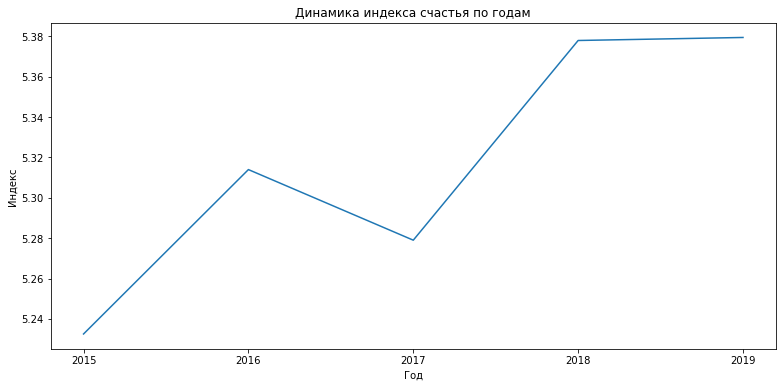

In [183]:
#Изучим динамику среднего показателя по всем странам счастья по годам
plt.plot(dynamics_by_year.index, dynamics_by_year['Happiness Score'])
plt.xticks(np.arange(2015,2020,1))
plt.title('Динамика индекса счастья по годам')
plt.xlabel('Год')
plt.ylabel('Индекс')
# Из графика видим, что медиана Индекса изменяется по годам. При этом видно уменьшение в 2017 году и рост в 2018-2019 годы.

In [175]:
#Данные сформированы по странам и регионам только в 2015-2016 годы. Изучим распределение среднего значения Индекса по регионам за 2016 год.
reg = df_2016[['Happiness Score']+['Region']].groupby('Region').mean()
reg

,Happiness Score
Region,
Australia and New Zealand,7.323500
Central and Eastern Europe,5.370690
Eastern Asia,5.624167
Latin America and Caribbean,6.101750
Middle East and Northern Africa,5.386053
North America,7.254000
Southeastern Asia,5.338889
Southern Asia,4.563286
Sub-Saharan Africa,4.136421


<AxesSubplot:title={'center':'Happiness index by region'}, xlabel='Region', ylabel='Happiness Score'>

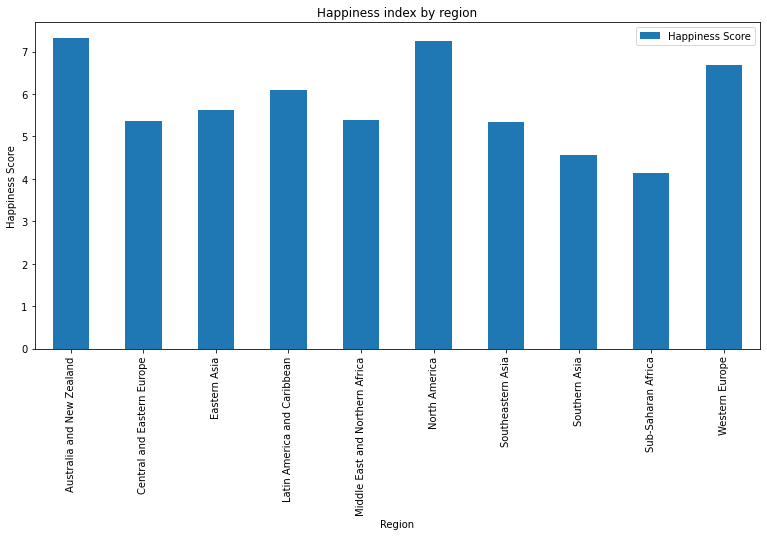

In [179]:
reg.plot(kind='bar', 
        title='Happiness index by region',
        xlabel='Region',
        ylabel='Happiness Score')
#Индекс имеет наибольшее в Australia and New Zealand и Северной Америке и наименьшее в Sub-Saharan Africa

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Score distribution')

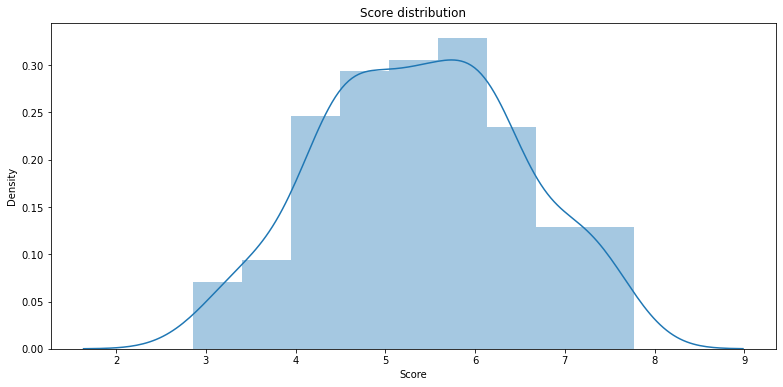

In [153]:
# Изучим данные за 2019 год более подробно.
ax = sns.distplot(df_2019.Score)
ax.set_title('Score distribution')
# Зрительно распределение индекса счастья близко к нормальному- пик по середине, уменьшение по краям.

<AxesSubplot:title={'center':'Correlation between Global Sales and User Score'}, xlabel='GDP per capita', ylabel='Score'>

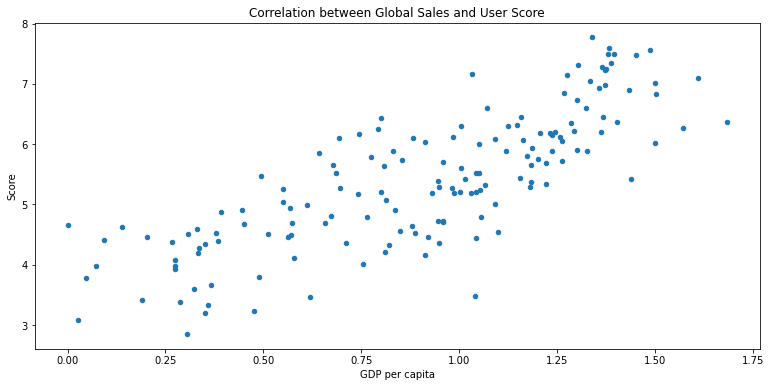

In [141]:
# посмотрим на взимосвязь оценкой счастья и ВВП на душу населения
df_2019.plot(kind='scatter', 
        x='GDP per capita', 
        y='Score', 
        title='Взаимосвязь между уровнем счастья и ВВП на душу населения')
# Гипотеза о существовании прямой зависимости между ВВП на душу населения и Индекса счастья подтверждается.

<AxesSubplot:title={'center':'Score distributionn'}>

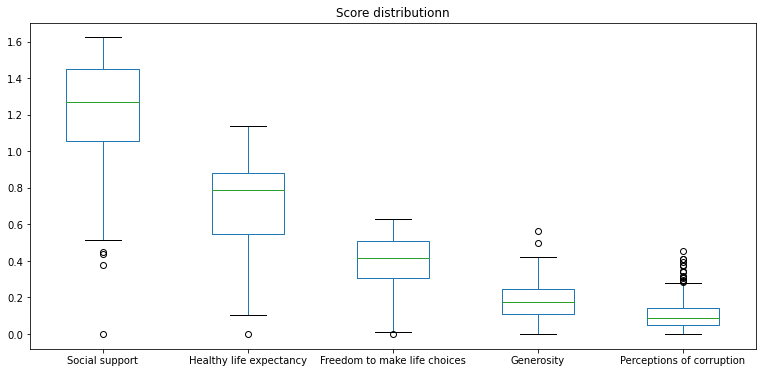

In [149]:
df_2019[['Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']].plot(kind='box',
                                        title='Score distributionn')
#построенный график иллюстрирует, что имеются разные значения размахов, медиан по нашим переменным (возможно разная система баллов)
#Есть выбросы по всем переменным, больше всего по Perceptions of corruption.

<AxesSubplot:title={'center':'Score of Social support'}, ylabel='Frequency'>

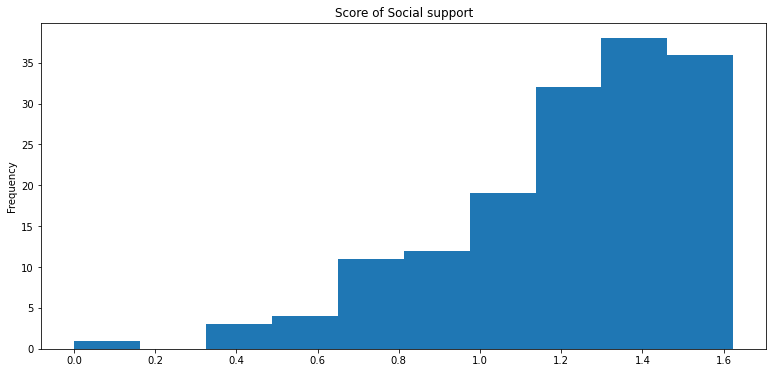

In [160]:
# распределение оценок Social support
df_2019['Social support'].plot(kind='hist', 
                   bins=10,
                   title='Score of Social support',          
                   )
#Длинный левый хвост (пик частоты оценок 1.3-1.6), население чаще довольно уровнем соц. поддержки

<AxesSubplot:title={'center':'Score of Perceptions of corruption'}, ylabel='Frequency'>

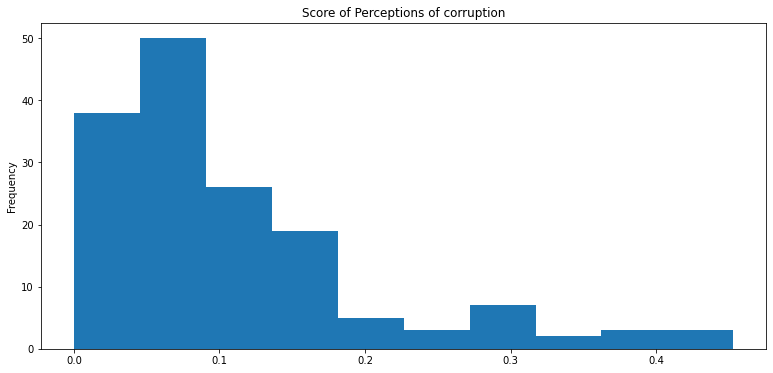

In [127]:
# распределение оценок  Perceptions of corruption
df_2019['Perceptions of corruption'].plot(kind='hist', 
                   bins=10,
                   title='Score of Perceptions of corruption'
                   )
#Тут наоборот правый хвост. Пик имеем на оценки 0-0.1, получается что в большинстве стран люди не довольны уровнем коррупции.

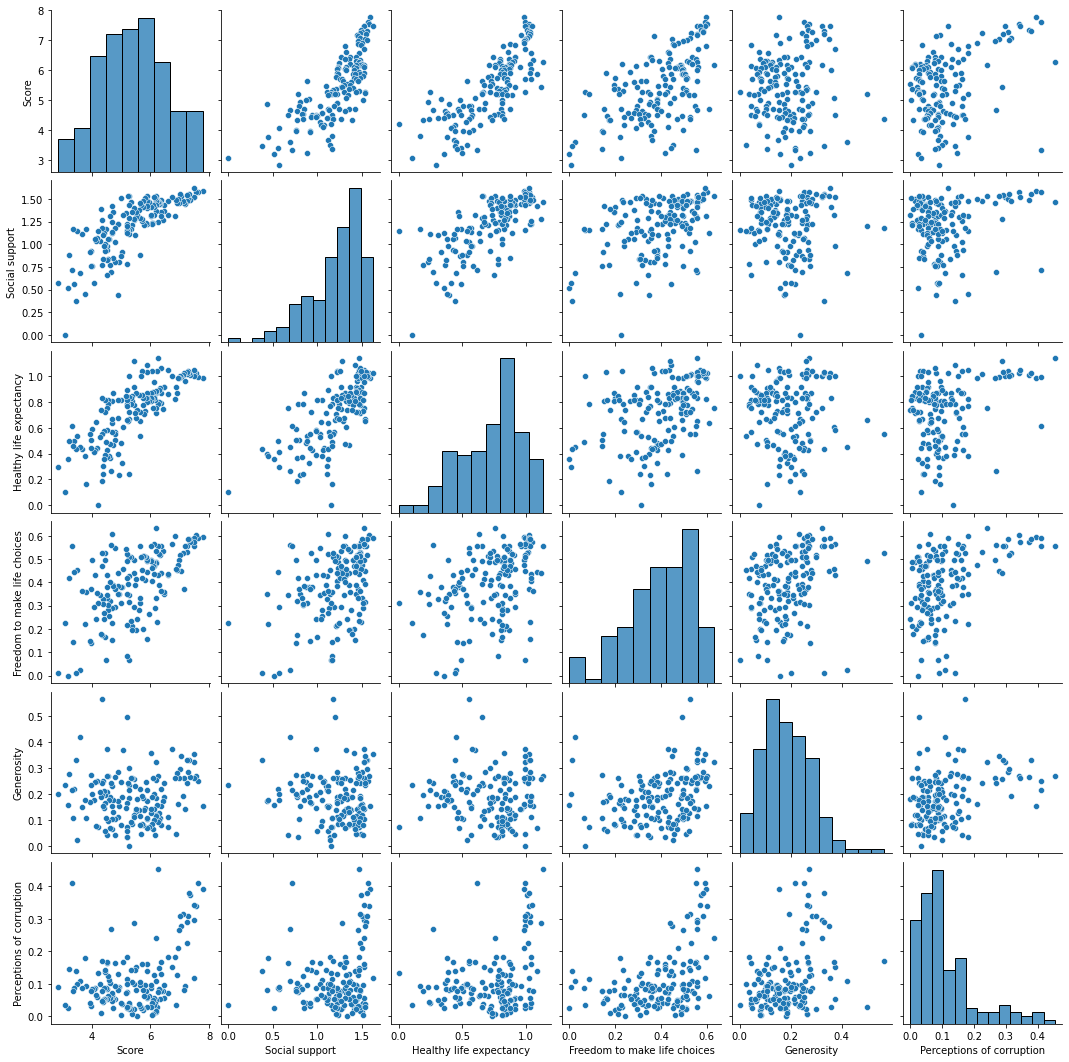

In [191]:
# Построим гистограммы всех переменных и их парные зависимости.
sns.pairplot(df_2019[['Score','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']])
# Гистограммы я описала выше. По графикам scatterplot, похоже на линейную зависимость между Score и Social Suport